In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glacierml as gl
pd.set_option('display.max_column',None)

In [5]:
model_path = os.path.join(
    '/data/fast1/glacierml/models/LOO/' ,'rgi_est_raw.pkl'
)
RGI = pd.read_pickle(model_path) 

#### Add Farinotti mean thickness estimates ####
ref_pth = '/data/fast1/glacierml/data/reference_thicknesses/'
ref = pd.DataFrame()
for file in os.listdir(ref_pth):
    if 'Farinotti' in file:
        file_reader = pd.read_csv('reference_thicknesses/' + file)
        ref = pd.concat([ref, file_reader], ignore_index = True) 
ref = ref.rename(columns = {
     'Farinotti Mean Thickness':'FMT',
})
ref = ref[[
     'FMT',
     'RGIId',
]]

df = pd.merge(RGI, ref, how = 'inner', on = 'RGIId')
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,2725,2385,42.0,346,839,0,0,0,0,9,9,NaN,01,16.277309,14.953861,16.694000,16.503345,16.270660,16.387028,16.016808,16.492792,13.731221,15.645153,16.584284,17.033907,16.441111,16.247591,15.764664,17.265984,18.296114,17.446587,17.781895,15.735214,16.638071,17.323732,16.754688,16.614246,18.158390,19.007336,16.249086,17.789362,17.527275,16.842936,17.503490,18.452667,17.554615,17.019976,15.990520,15.349936,18.239737,13.840107,14.836700,18.431520,17.526781,13.500299,16.043545,17.986980,17.532366,16.077944,16.615873,16.622864,18.498369,25.100864,14.253600,15.265696,14.689593,17.423824,12.993851,15.165100,14.188037,14.914692,19.073793,21.630016,13.054076,15.582692,15.758699,25.390738,20.387331,23.640579,18.952639,21.204344,19.756466,23.073219,18.495457,21.120855,20.512154,19.207048,19.453024,17.356770,17.547823,15.365030,15.656080,17.515306,16.157310,15.822584,16.130745,15.710287,15.627931,20.446331,17.713467,17.581598,14.921235,17.123339,18.198267,18.697874,26.132809,16.916780,16.243801,16.174265,14.198225,17.368719,14.767431,19.973389,17.080496,16.496000,16.075808,16.526133,25.402103,25.848440,15.389005,16.136736,16.740885,16.189621,17.583885,25.984201,17.404371,23.669857,13.357930,18.179487,12.855234,11.240031,17.296543,19.448481,15.156308,18.037245,16.257404,16.105001,20.486477,15.540879,15.283449,15.516177,15.282767,19.823141,20.566320,15.502954,19.014490,21.546610,15.918286,17.977177,19.857008,16.855869,18.062645,18.275928,18.532713,17.624506,19.784925,16.665798,11.477992,15.127000,15.541538,17.168047,12.050786,15.876202,15.085879,12.467257,14.309031,11.930584,11.343918,14.936225,10.198374,16.696497,14.893176,10.165212,8.739060,13.874270,9.754492,8.196445,8.045223,8.362290,16.227907,18.265079,16.520351,13.563940,18.026171,10.988451,10.115927,15.983336,9.324627,6.848248,15.672099,16.868109,19.921408,17.147453,15.378146,15.809608,14.955585,15.070559,15.497086,15.061805,17.551743,16.039452,22.005207,16.781631,16.186377,21.432890,16.758854,14.632924,19.698366,17.936598,20.195055,21.196356,18.484770,21.393030,19.014027,14.088100,17.732983,12.879424,13.795535,10.666667,13.161463,22.818604,13.175793,11.826213,12.724860,13.561060,13.090656,13.046973,13.562998,11.996654,14.737124,14.423245,11.989023,14.179888,14.271254,14.572264,13.985809,14.578692,13.800107,11.057722,13.400297,14.671399,14.059649,14.415533,12.463089,14.190796,11.478177,14.395720,13.810367,13.382660,13.147652,14.228340,14.710816,13.920391,15.104506,13.774546,12.476313,13.384902,12.551325,13.021507,13.818346,12.550982,13.267177,14.472327,11.889599,14.496082,14.688834,12.923995,13.887196,13.625621,13.045137,13.295097,12.778278,12.572529,13.148931,14.493125,13.363637,14.629187,12.288808,14.819217,13.791186,14.931712,13.400538,13.239247,12.570488,13.328512,13.999707,19.9889

In [3]:
cols = []
for i in range(273):
    cols.append(i)

In [6]:
#### Calculate 95% confidence intervals ####
X = np.mean(df[cols], axis = 1)
se = np.std(df[cols], axis = 1) / np.sqrt(len(cols))

df['LCI'] = X - 2 * (1.96 * se)
df['UCI'] = X + 2 * (1.96 * se)

V = np.zeros((len(df),2))

indexes = []
for i in range(216501):
    indexes.append(i)

V[indexes, 0] = df['LCI'] / 1e3 * df['Area']
V[indexes, 1] = df['UCI'] / 1e3 * df['Area']

Vlb = round(sum(V[:,0]) / 1e3, 3)
Vub = round(sum(V[:,1]) / 1e3, 3)

print(f'[{Vlb},{Vub}]')

[134.048,137.267]


In [ ]:
(Vub - Vlb) / 2

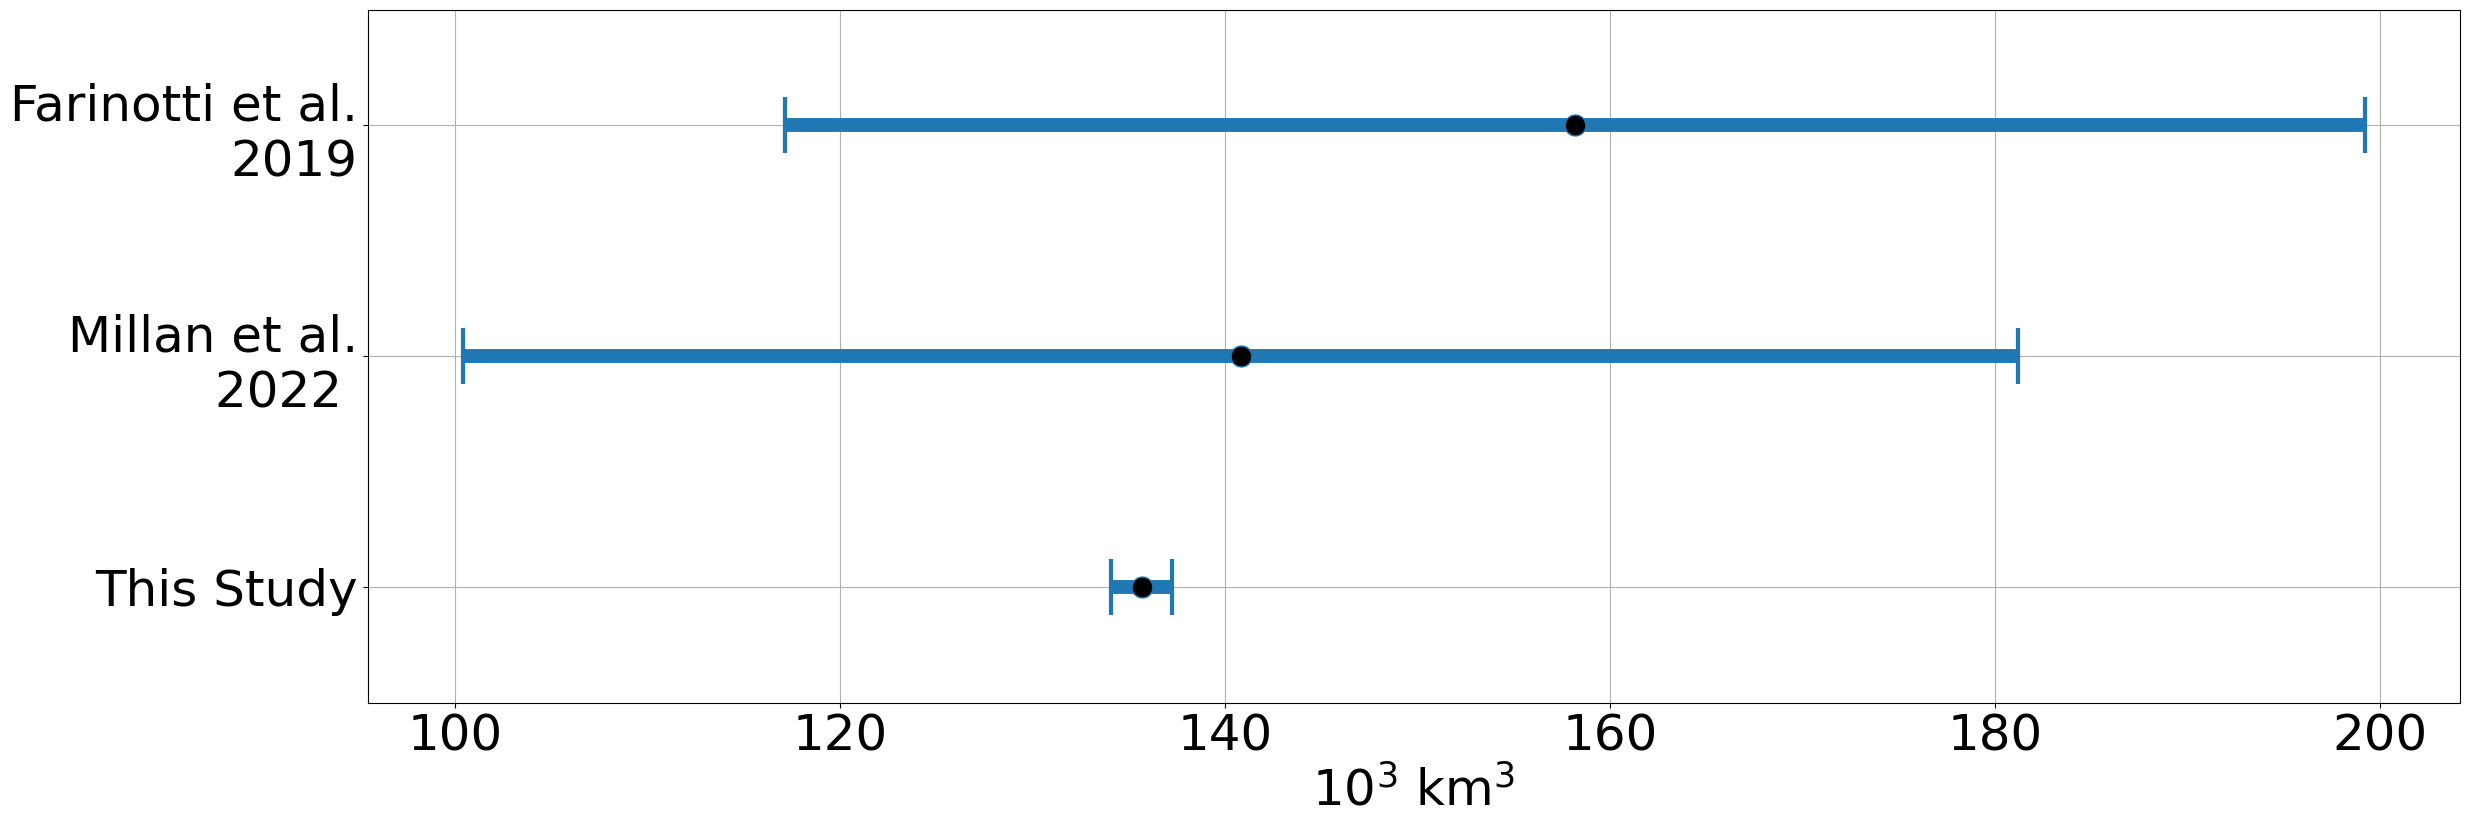

In [13]:


fig, ax = plt.subplots(1,1,figsize = (27,9))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (135.657,140.8,158.17)
yr = (1.6,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'This Study',
     f'Millan et al.\n2022 ',
     f'Farinotti et al.\n2019',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
#              ecolor = 'b',
#              color = 'k',
             linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=36)
plt.tick_params(axis='x', which='major', labelsize=36)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10$^3$ km$^3$', fontsize = 36)
plt.grid(visible = True, axis = 'both')
plt.show()

In [ ]:
19400 / 2

In [ ]:
a = np.random.normal(loc=sum(V),scale=2*np.sqrt(len(V)*np.var(V)),size=len(V))
b = np.random.normal(158000,scale= 20500,size=216501)
plt.hist(a,bins = 25,alpha = 0.5)
plt.hist(b,bins = 25,alpha = 0.5)
# plt.plot(
    
# )

In [ ]:
###Coefficient of Overlap
from statistics import NormalDist

NormalDist(mu=135000, sigma=2*np.sqrt(len(V)*np.var(V))).overlap(NormalDist(mu=158000, sigma=20500))